---
### 15.3.1 人工神经网络概述
人工神经网络 (ANN)，在模式识别、预测和控制系统等领域有广泛应用，能用来解决常规计算难以解决的问题
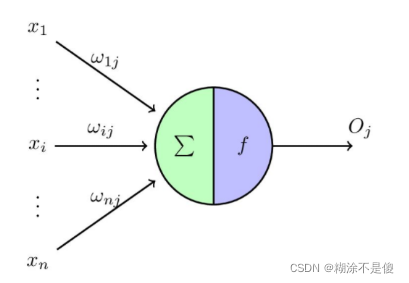
> 单层感知器模型

激励函数 $f$ 用来执行对神经元所获得的网络输入的变换，有以下5种:
1. 线性函数
   $$f(u)=ku+c$$

2. 非线性斜面函数
   $$
   f(u)=
      \begin{cases}
         \gamma,\quad&u\geq\theta\\
         ku,\quad&|u|<\theta\\
         -\gamma,\quad &u\leq-\theta
      \end{cases}
   $$
   其中 $\gamma$ 称为饱和值，即 $\gamma$ 为神经元的最大输出
   
3. 阈值函数/阶跃函数
   $$
   f(u)=
      \begin{cases}
         \beta,\quad &u>\theta\\
         -\gamma,\quad &u\leq \theta
      \end{cases}
   $$
   $\theta$ 为阈值。阈值函数有两种特殊形式
   $$
   \begin{align*}
      &{\text 二值形式}\quad f(u)=\begin{cases}1,\ &u>\theta\\0,\ &u\leq\theta\end{cases}\\
      &{\text 双极形式}\quad f(u)=\begin{cases}1,\ &u>\theta\\-1,\ &u\leq\theta\end{cases}
   \end{align*}
   $$

4. sigmoid 函数
   
   将 $(-\infty, +\infty)$ 映射到 $(0,1)$
   $$
   f(u)=\dfrac{1}{1+{\rm e}^{-u}}
   $$

5. tanh 函数
   
   较 sigmoid 常见，将 $(-\infty, +\infty)$ 映射到 $(-1,1)$
   $$
   f(u) = \dfrac{{\rm e}^u-{\rm e}^{-u}}{{\rm e}^u+{\rm e}^{-u}}
   $$

### 15.3.2 神经网络的基本模型
#### 1. 感知器
单层感知器是一个具有一层神经元、采用阈值激活函数的前向网络，通过对网络权值的训练，可以使感知器对一组输入向量的响应达到 0 或 1 的目标输出，从而实现对输入向量的分类

感知器通过监督式的权值训练来完成，所以网络的学习过程需要输入和输出样本对

In [7]:
import numpy as np
from sklearn.linear_model import Perceptron     # 感知器

x0 = np.array([[-0.5,-0.5,0.3,0.0], [-0.5,0.5,-0.5,1.0]]).T
y0 = np.array([1,1,0,0])
md = Perceptron().fit(x0, y0)

print("模型系数：", md.coef_)
print("常数项：", md.intercept_)
print("模型精度：", md.score(x0, y0))   # 模型检验
print("预测值：", md.predict([[-0.5, 0.2]]))

模型系数： [[-1.3 -0.5]]
常数项： [0.]
模型精度： 1.0
预测值： [1]


#### 2. BP 神经网络
BP 神经网络由输入层、中间层和输出层组成，中间层可拓展为多层。相邻层之间各神经元进行全连接，而每层各神经元之间无连接

网络按有监督方式进行学习，最大的优点是具有极强的 ***非线性映射*** 能力，主要用于以下四个方面：

(1) 函数逼近；(2) 模式识别；(3) 预测；(4) 数据压缩

- 理论上对于三层及以上的 BP 网络，只要隐层神经元数目足够多，该网络就能以任意精度逼近一个非线性函数

- BP 神经网络对外界输入样本有很强的识别与分类能力，解决了神经网络发展史上的非线性分类难题

- BP 神经网络还具有优化计算能力，其本质上是一个非线性优化问题，可以在已知约束条件下，寻找参数组合，使得该组合确定的目标函数达到最小

####  3. RBF 神经网络
RBF 神经网络由一个输入层、一个隐含层和一个输出层组成，具有很强的逼近能力、分类能力和学习速度，其工作原理是把网络看成对未知函数的逼近，任何函数都可以表示成一组基函数的加权和，也即选择各隐层神经元的传输函数，使之构成一组基函数来逼近未知函数。